# connect to db

In [2]:
import pandas
import configparser
import psycopg2

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [4]:
conn = psycopg2.connect(
                        host = host,
                        user= user,
                        password = pwd,
                        dbname = db)

# Q1

In [6]:
sql = """select * from student"""

In [8]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_16292/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


# Q2

In [17]:
sql = """select professor.p_name, course.c_name
from professor 
inner join course 
on professor.p_email = course.p_email"""

In [18]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_16292/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


# Q3

In [21]:
sql = """ select c_number,count(*) as num_student
from enroll 
group by c_number
order by num_student asc"""

/tmp/ipykernel_16292/1616739748.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

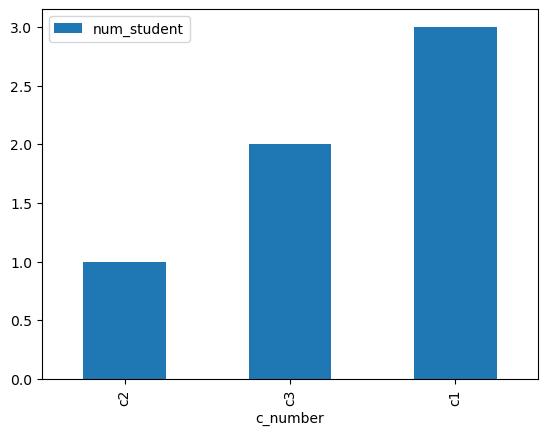

In [25]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x= 'c_number', y= 'num_student')

# Q4

In [39]:
sql = """ select professor.p_name, count(course.c_number) as num_courses_taught
from professor 
inner join course on professor.p_email = course.p_email
group by professor.p_name
order by num_courses_taught asc"""

/tmp/ipykernel_16292/24195828.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

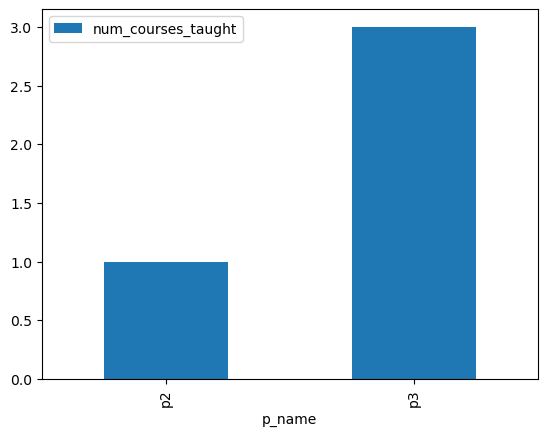

In [42]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x= 'p_name', y='num_courses_taught')

# Q5

In [55]:
cur = conn.cursor()

In [56]:
sql = """insert into professor(p_email,p_name,office_number)
values ('p4@jmu.edu','p4','o4')"""

In [57]:
cur.execute(sql)

In [58]:
conn.commit()

In [59]:
df= pandas.read_sql_query('select * from professor',conn)
df[:]

/tmp/ipykernel_16292/4130428698.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pandas.read_sql_query('select * from professor',conn)


,p_email,p_name,office_number
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [71]:
conn.rollback()

In [72]:
sql = """insert into course(c_number,c_name,room,p_email)
values ('c5','linkedin','r2','p4@jmu.edu')"""

In [73]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(c5) already exists.


In [74]:
conn.rollback()

In [75]:
conn.commit()

In [70]:
df= pandas.read_sql_query('select * from course',conn)
df[:]

/tmp/ipykernel_16292/2215404102.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [84]:
sql = """update course
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu'"""


In [85]:
sql = """delete from professor 
where p_email = 'p2@jmu.edu'"""

In [86]:
"""select * from enroll"""

'select * from enroll'

In [87]:
df= pandas.read_sql_query('select * from course',conn)
df[:]

/tmp/ipykernel_16292/2215404102.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu
